In [1]:
#two_streamlines.ipynb
#by Joe Hahn,
#jmh.datasciences@gmail.com,
#4 September 2018.
#
#simulate the viscous radial spreading of circular gravitating 2-streamline ringlet

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity

r.shape =  (1001, 2, 11)
total_ring_mass =  5e-09
shear_viscosity =  3e-11


In [4]:
#check a,e
print radial_width, total_ring_mass, shear_viscosity
print a.min(), a.max(), e.min(), e.max()

0.001 5e-09 3e-11
0.996227209551 1.00480356474 8.02040281043e-08 1.66932356558e-06


In [5]:
#a_avg = streamline's longitudinally-average semimajor axis
a_avg = a.mean(axis=2)
print a_avg.shape

(1001, 2)


In [6]:
#a_mid = ringlet's mean semimajor axis versus time
a_mid = a_avg.mean(axis=1)
print a_mid.shape

(1001,)


In [7]:
#t_orbits = time in units of ringlet orbit periods
twopi = 2*np.pi
t_orbits = times/twopi

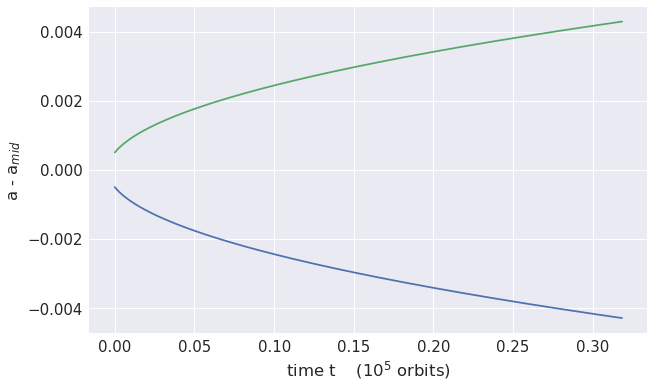

In [16]:
#plot a - a_mid versus time
f, ax = plt.subplots(figsize=(10, 6))
xp = t_orbits/1.0e5
for pidx in range(number_of_streamlines):
    da = a_avg[:, pidx] - a_mid
    p = ax.plot(xp, da, linestyle='-')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('a - a$_{mid}$')

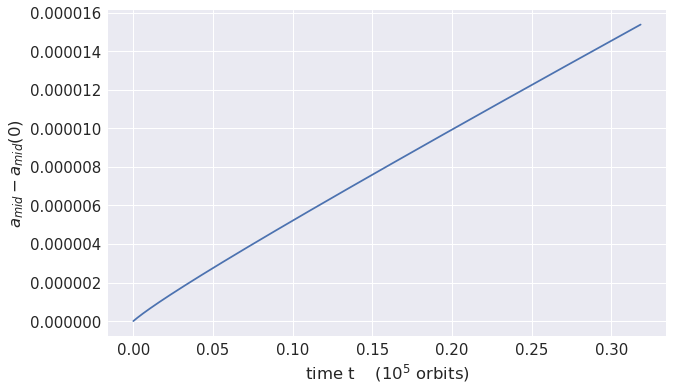

In [17]:
#plot a_mid over time...note that a_mid moves outwards despite energy loss due to dissipation
f, ax = plt.subplots(figsize=(10, 6))
xp = t_orbits/1.0e5
yp = a_mid - a_mid[0]
p = ax.plot(xp, yp, linestyle='-')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('$a_{mid} - a_{mid}(0)$')

In [18]:
#get each streamline's mass
a_init = a[0]
streamline_mass = (lambda0*twopi*a_init/particles_per_streamline).sum(axis=1)
streamline_mass_0 = streamline_mass[0]
streamline_mass_1 = streamline_mass[1]
print 'streamline_mass_0 = ', streamline_mass_0
print 'streamline_mass_1 = ', streamline_mass_1
print 'mass check = ', (streamline_mass_0 + streamline_mass_1)/total_ring_mass

streamline_mass_0 =  2.4999999773e-09
streamline_mass_1 =  2.50000002273e-09
mass check =  1.00000000001


In [19]:
#each streamline's semimajor axis over time
a_0 = a_avg[:,0]
a_1 = a_avg[:,1]
print a_0.shape, a_1.shape

(1001,) (1001,)


In [20]:
#system's total energy
GM = 1.0
a_ref = 2*a_0[0]                        #arbitrary reference distance
ratio = (a_ref - a_0)/(a_1 - a_0)
E_total = -GM*streamline_mass_0/(2*a_0) -GM*streamline_mass_1/(2*a_1) \
    -GM*streamline_mass_0*streamline_mass_1*np.log(ratio)

In [21]:
#energy dissipation rate
dt = times[1]-times[0]
dE_dt = np.gradient(E_total, dt)
Omega_mid = Omega(J2, Rp, a_mid)
dE_dt_exp = -(9.0/4)*shear_viscosity*(Omega_mid**2)*total_ring_mass

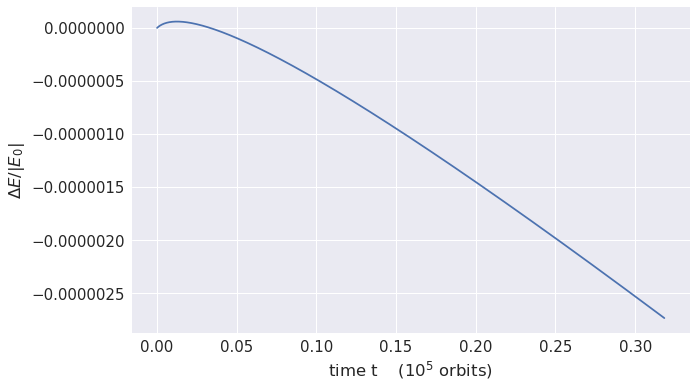

In [28]:
#plot E_total vs time
f, ax = plt.subplots(figsize=(10, 6))
xp = t_orbits/1.0e5
E0 = E_total[0]
yp = (E_total - E0)/np.abs(E0)
p = ax.plot(xp, yp, linestyle='-')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta E/|E_0|$')

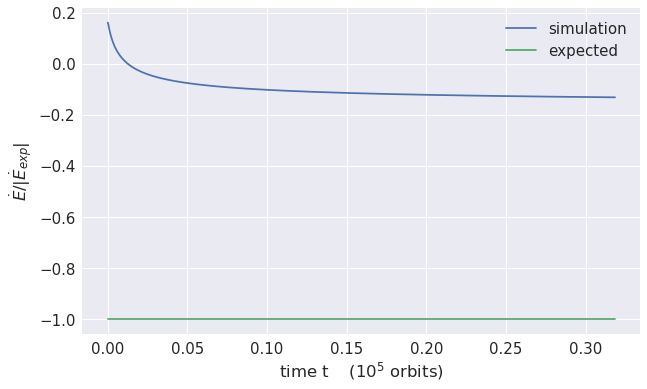

In [33]:
#plot dE/dt over time
f, ax = plt.subplots(figsize=(10, 6))
xp = t_orbits/1.0e5
factor = np.abs(dE_dt_exp)
yp = dE_dt/factor
p = ax.plot(xp, yp, linestyle='-', label='simulation')
yp = xp*0 + dE_dt_exp/factor
p = ax.plot(xp, yp, linestyle='-', label='expected')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\dot{E}/|\dot{E}_{exp}|$')
p = plt.legend()